### Importando as Bibliotecas

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o Dataset

In [23]:
df = pd.read_csv('listings.csv', usecols = ['room_type', 'price'])

In [24]:
df.head()

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55


In [25]:
df

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5592,Entire home/apt,128
5593,Entire home/apt,100
5594,Entire home/apt,400
5595,Entire home/apt,60


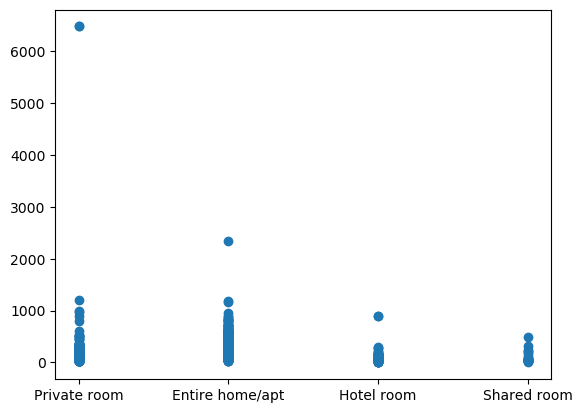

In [26]:
plt.scatter(df.room_type, df.price)
plt.show()

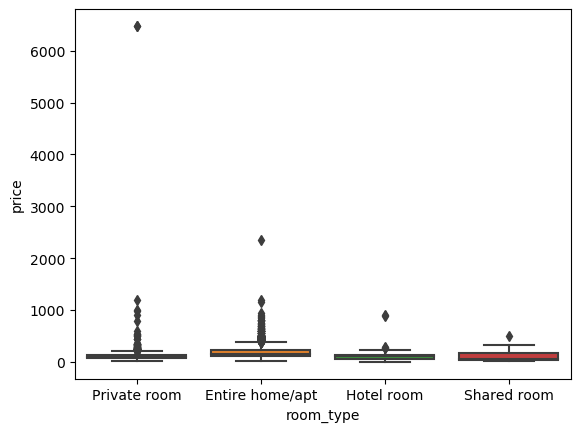

In [27]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()

In [28]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQ = Q3 - Q1
    LI = df < (Q1 - 1.5*IQ)
    LS = df > (Q3 + 1.5*IQ)
    
    df_final = df[~(LI | LS)]
    return df_final

In [29]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)


In [30]:
ind_dif = df.index.difference(df_removido.index)

In [31]:
ind_dif

Int64Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
            ...
            5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
           dtype='int64', length=259)

In [32]:
for i in range(0, len(ind_dif), 1):
    df_final = df.drop([ind_dif[i]])
    df = df_final

In [33]:
df_final

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5591,Entire home/apt,52
5592,Entire home/apt,128
5593,Entire home/apt,100
5595,Entire home/apt,60


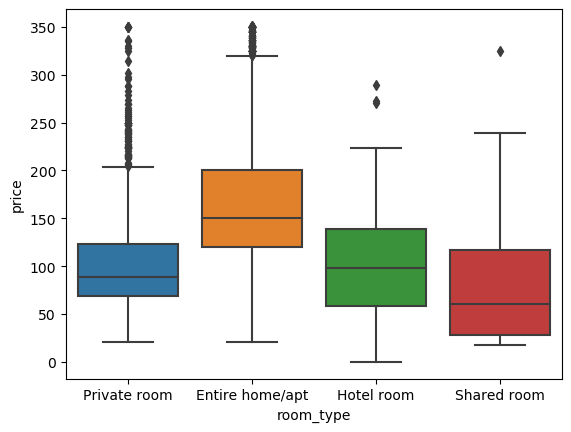

In [34]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()